<h2><center> Cryptojacking Detection - Group 1 Mini-Project </h2></center>
<figure>
<center><img src ="https://www.forex.academy/wp-content/uploads/2020/04/Cryptojacking-How-To-Protect-Your-Business.jpg" width = "700" height = '500' alt="Cryptojacking Detection"/>

**About the problem**
> **Cryptojacking**, short for "*cryptocurrency mining hijacking,*" is a cyberattack in which malicious actors secretly use someone else's computer or computing resources to mine cryptocurrencies like Bitcoin, Ethereum, Monero, and others without the owner's consent or knowledge. In essence, it involves the unauthorized and often clandestine use of computing power to generate cryptocurrencies for the benefit of the attacker.


**The objective of this challenge is**:
> classify network activity from various websites as either cryptojacking or not based on features related to both network-based and host-based data.



## Feature Description

**`I/O Data Operations`**: Speed at which the process is issuing read and write I/O operations\
**`I/O Data Bytes`**: Speed at which the process is reading and writing bytes in I/O operations\
**`Number of subprocesses`**: Number of sub-processes that are currently active in a parent process\
**`Time on processor`**: The total time, in seconds, that a process has been running\
**`Disk Reading/sec`**: Speed of disk reading operations\
**`Disc Writing/sec`**: Speed of writing operations to disk\
**`Confirmed byte radius`**: The ratio of Memory/Bytes committed and Memory/Confirmation limit\
**`Pages Read/sec`**: Speed rate at which the disk was read in order to resolve hard page errors\
**`Pages Input/sec`**: Speed at which pages are written to disk to free up space in physical memory\
**`Page Errors/sec`**: This is the average number of pages with faults per second\
**`Bytes Sent`**: The rate at which bytes leave the browser’s HTTP requests\
**`Received Bytes (HTTP)`**: Speed of bytes arriving to the browser’s HTTP responses\
**`Network packets sent`**: Speed of sending packets in the TCP protocol\
**`Network packets received`**: Packet reception speed over the TCP protocol

## Table of contents:

1. [Importing Libraries](#Libraries)
2. [Data Loading and Preprocesing](#Data)\
    2.1 [Data Loading & Preview](#Load)\
    2.2 [Data Preprocessing](#Preprocessing)
3. [Explanatory Data Analysis](#EDA)\
    3.1 [Summary Statistics](#Statistics)\
    3.2 [Data Distribution Virtualization](#Distributions)\
    3.3 [Correlation Analysis](#Correlation)\
    3.4 [Feature Pairwise Relationship](#Pairplots)\
    3.5 [Feature Distributions by Cryptojacking Status](#Boxplots)
4. [Model Training and Evaluation](#Modelling))\
    4.1 [Feature Engineering](#Engineering)\
    4.2 [Data Spliting](#Split)\
    4.3 [Feature Selection](#Features)\
    4.4 [Model Building](#Training)\
    4.5 [Hyperparameter Tuning](#Tuning)
5. [Decision Tree Classification](#DecisionTree)
8. [Final Model Selection](#Selection)

<a name="Libraries"></a>
## 1. Importing Libraries

In [ ]:
SEED = 2023

# Import libraries
import pandas as pd
import numpy as np
import itertools

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    accuracy_score,
    make_scorer,
    precision_recall_curve,
    precision_recall_fscore_support,
    roc_curve,
    auc,
)
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.feature_selection import RFECV, SelectKBest

from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix

<a name="Data"></a>
## 2. Data Loading and Preprocessing

<a name="Load"></a>
### 2.1 Data Loading & Preview

In [ ]:
# Load data
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [ ]:
# preview train set
train.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [ ]:
# preview test set
test.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_L7RNFK5JC9,32.709430,121124.141400,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.0,726.318848,20.008686
1,ID_KUTY5K1G5F,2.065990,2029.713475,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.0,385.473839,33.015399
2,ID_H6PJWKU831,114.524684,3888.550764,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.0,504.828540,30.091141
3,ID_DNQXNVTXHE,27.036810,5581.324782,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.0,465.950312,22.211252
4,ID_8CRTF1BJOD,1.177267,176.634467,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.0,771.665166,31.032570


In [ ]:
# check the size of data sets
train.shape, test.shape

((8908, 16), (3818, 15))

- Train set have;
    * 8,908 rows/activities and 15 columns/features and a target variable (**Label**)
    * This data will be used for the entire process of model training and evaluation
    
    
- Test set have;
    * 3,818 rows/activities and 15 columns/features with no target variable
    * This is a data that will be used on the final model for predictions

<a name="Preprocessing"></a>
### 2.2 Data Preprocessing

In [ ]:
# checking for missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

* There are no any null/missing values on both train and test sets

In [ ]:
# checking for duplicated activities
train.duplicated().any(), test.duplicated().any()

(False, False)

- There are no any duplicated activities in both train and test set

<a name="EDA"></a>
## 3. Explanatory Data Analysis

<a name="Statistics"></a>
### 3.1 Summary Statistics

In [ ]:
train.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
I/O Data Operations,8908.0,36.429,75.885,0.000,1.394,11.614,34.495,1795.316
I/O Data Bytes,8908.0,113556.436,489684.616,0.000,813.632,4930.482,39403.571,4677280.322
Number of subprocesses,8908.0,29.812,5.691,1.000,27.000,28.000,30.000,51.000
Time on processor,8908.0,0.496,1.594,0.000,0.000,0.035,0.451,25.246
Disk Reading/sec,8908.0,5.353,19.287,0.044,0.756,1.711,5.846,1064.819
Disc Writing/sec,8908.0,1.046,15.668,0.000,0.000,0.000,0.022,831.504
Bytes Sent/sent,8908.0,559.547,1939.745,1.198,33.844,67.366,221.315,98097.784
Received Bytes (HTTP),8908.0,16558.044,90428.025,1.555,27.378,89.058,561.381,4812144.222
Network packets sent,8908.0,4.795,20.798,0.022,0.400,0.711,1.555,1118.878
Network packets received,8908.0,12.626,61.247,0.022,0.333,0.636,1.711,3183.701


- Most the features have outliers

<a name="Distributions"></a>
### 3.2 Data Distribution Visualization

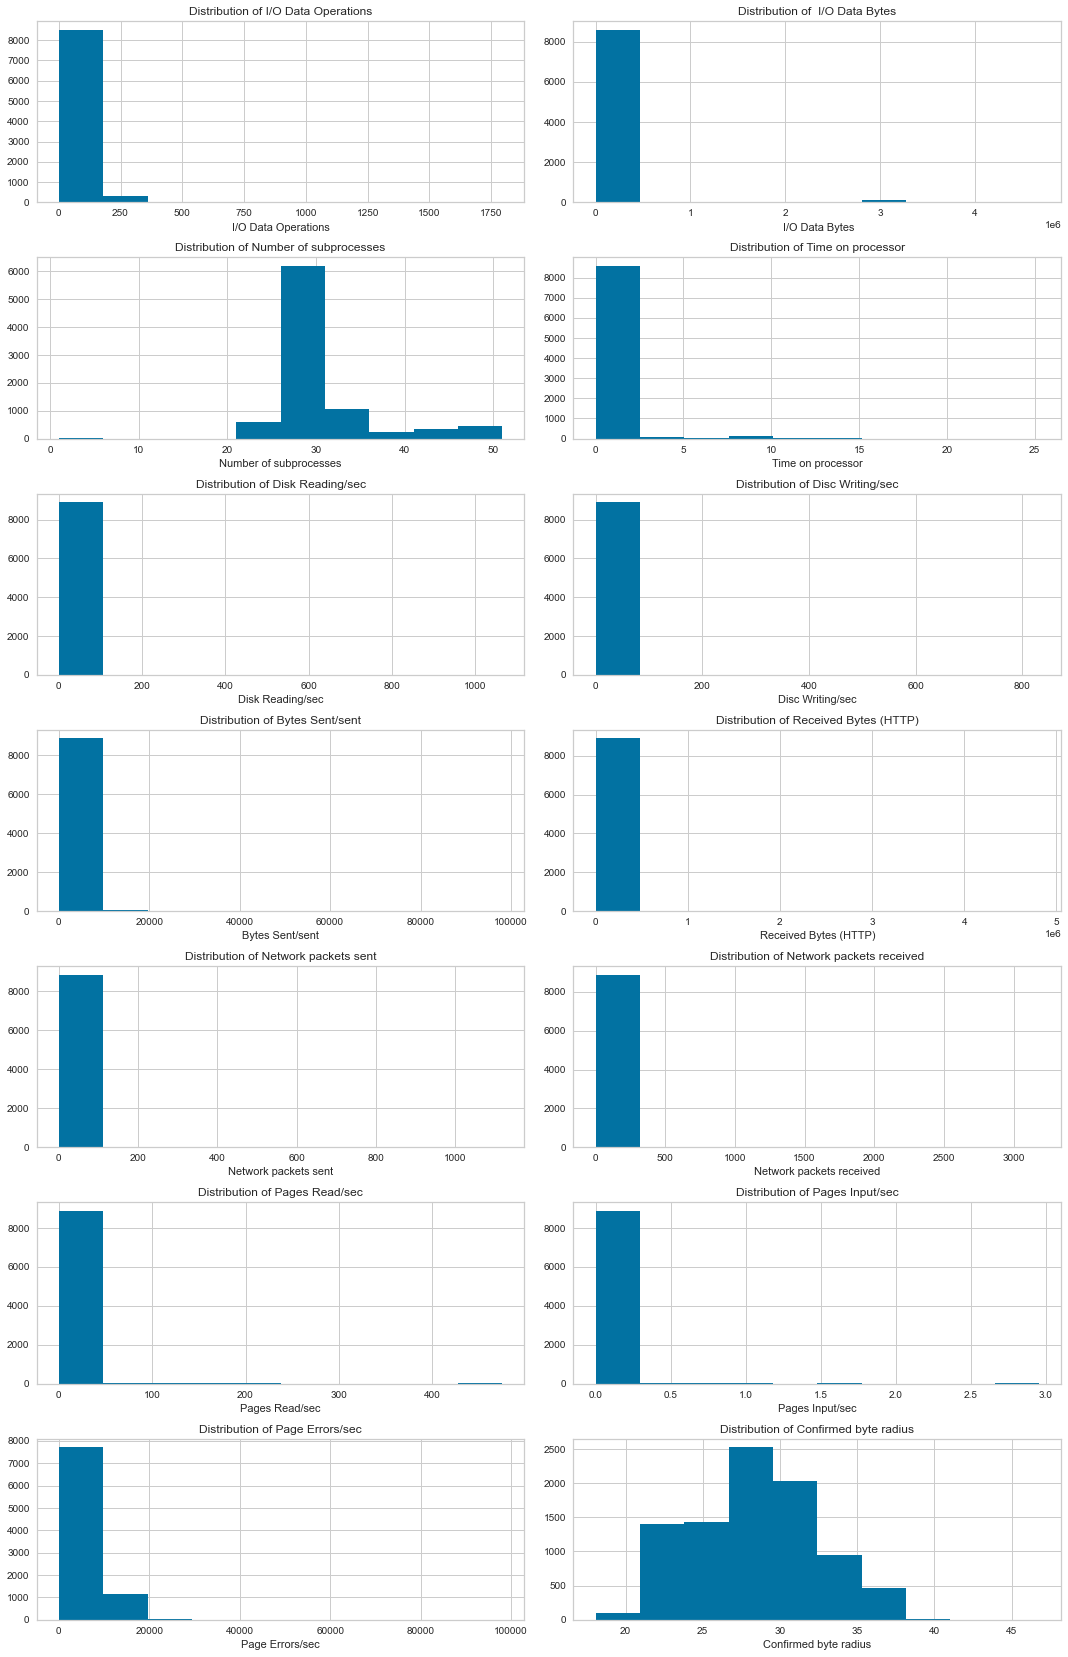

In [ ]:
# Create histograms for numerical features
plt.figure(figsize=(15, 24))

numeric_features = train.drop(columns=["ID","Label"]).columns

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(7, 2, i)
    plt.hist(train[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

<a name="Correlation"></a>
### 3.3 Correlation Analysis

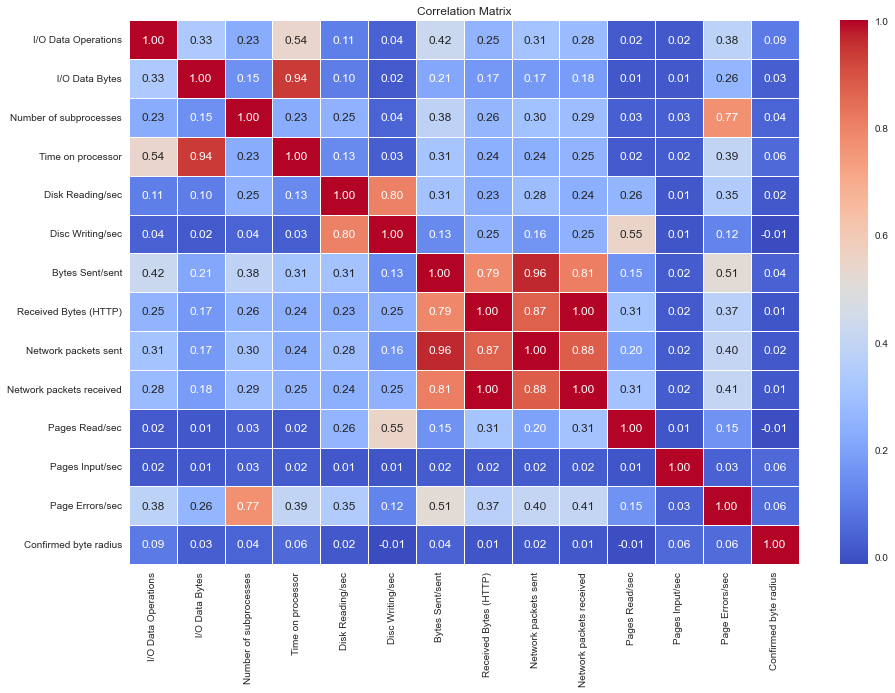

In [ ]:
# Correlation analysis
correlation_matrix = train[numeric_features].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- Most features are highly correlated
- This includes;
    * Disc, Bytes, and Network features which each are correlated to one another
    * Data Operations and Time on processors
    * Number of subprocesses and Pages Errors/sec
    * Disc Writing/sec and Page Read/sec

<a name="Pairplots"></a>
### 3.4 Features Pairwise Relationship

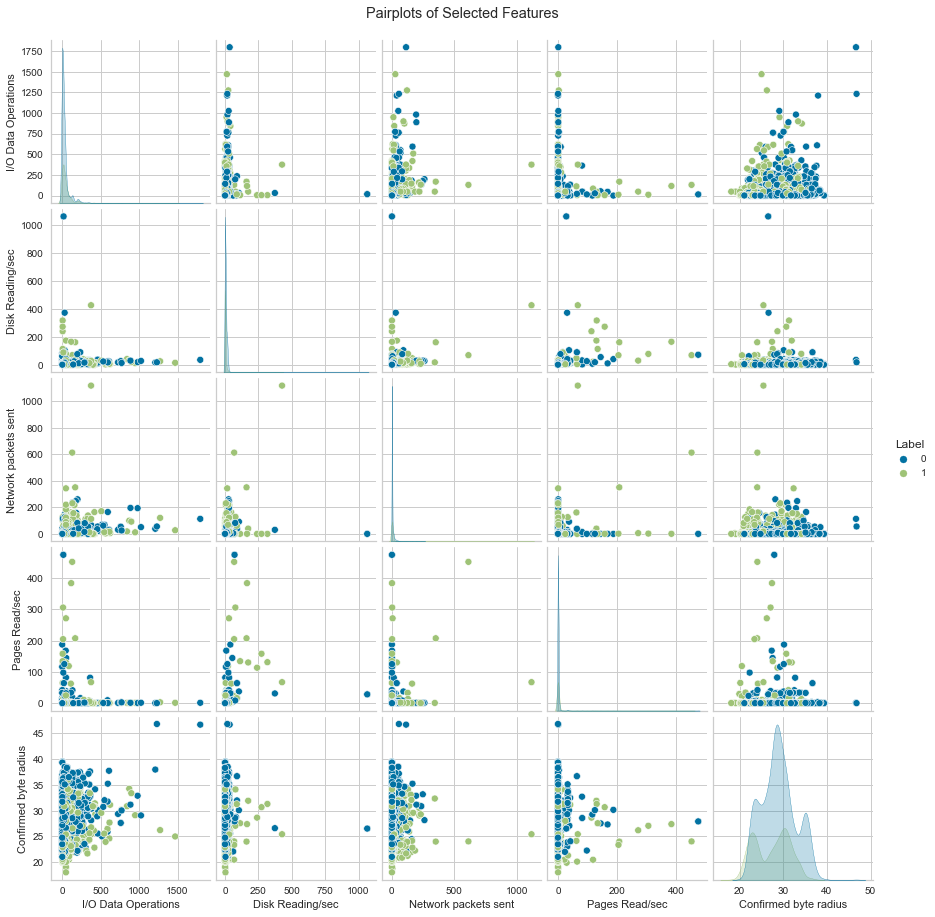

In [ ]:
# Pairplots for selected features
selected_features = ['I/O Data Operations', 'Disk Reading/sec', 'Network packets sent',
                     'Pages Read/sec', 'Confirmed byte radius','Label']
sns.pairplot(train[selected_features], diag_kind='kde', hue='Label')
plt.suptitle('Pairplots of Selected Features', y=1.02)
plt.show()

<a name="Boxplots"></a>
### 3.5 Feature Distributions by Cryptojacking Status

<a name="Outliers"></a>
#### 3.5.1 Outliers Presented

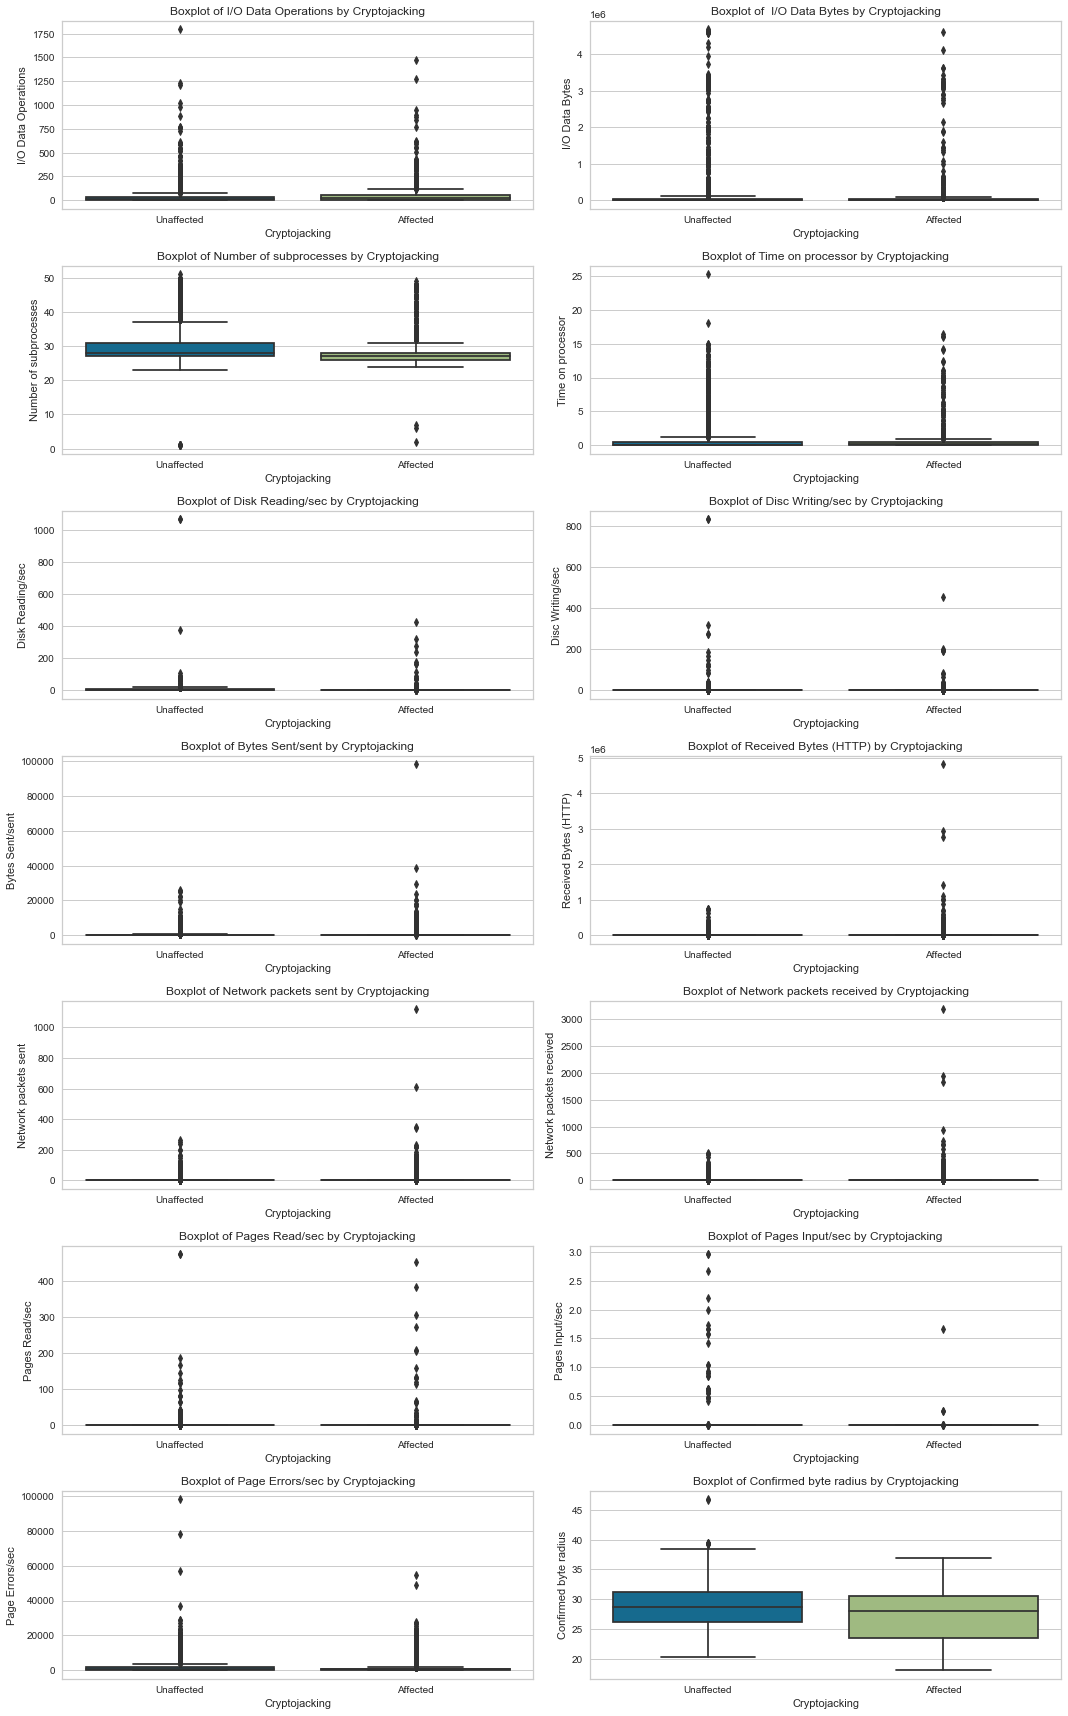

In [ ]:
# Boxplots for features
plt.figure(figsize=(15, 24))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(7, 2, i)
    sns.boxplot(x='Label', y=feature, data=train)
    plt.title(f'Boxplot of {feature} by Cryptojacking')
    plt.xlabel('Cryptojacking')
    plt.ylabel(feature)
    plt.xticks(ticks=[0,1], labels=['Unaffected','Affected'])

plt.tight_layout()
plt.show()

<a name="Nooutliers"></a>
#### 3.5.2 Outliers Not Presented

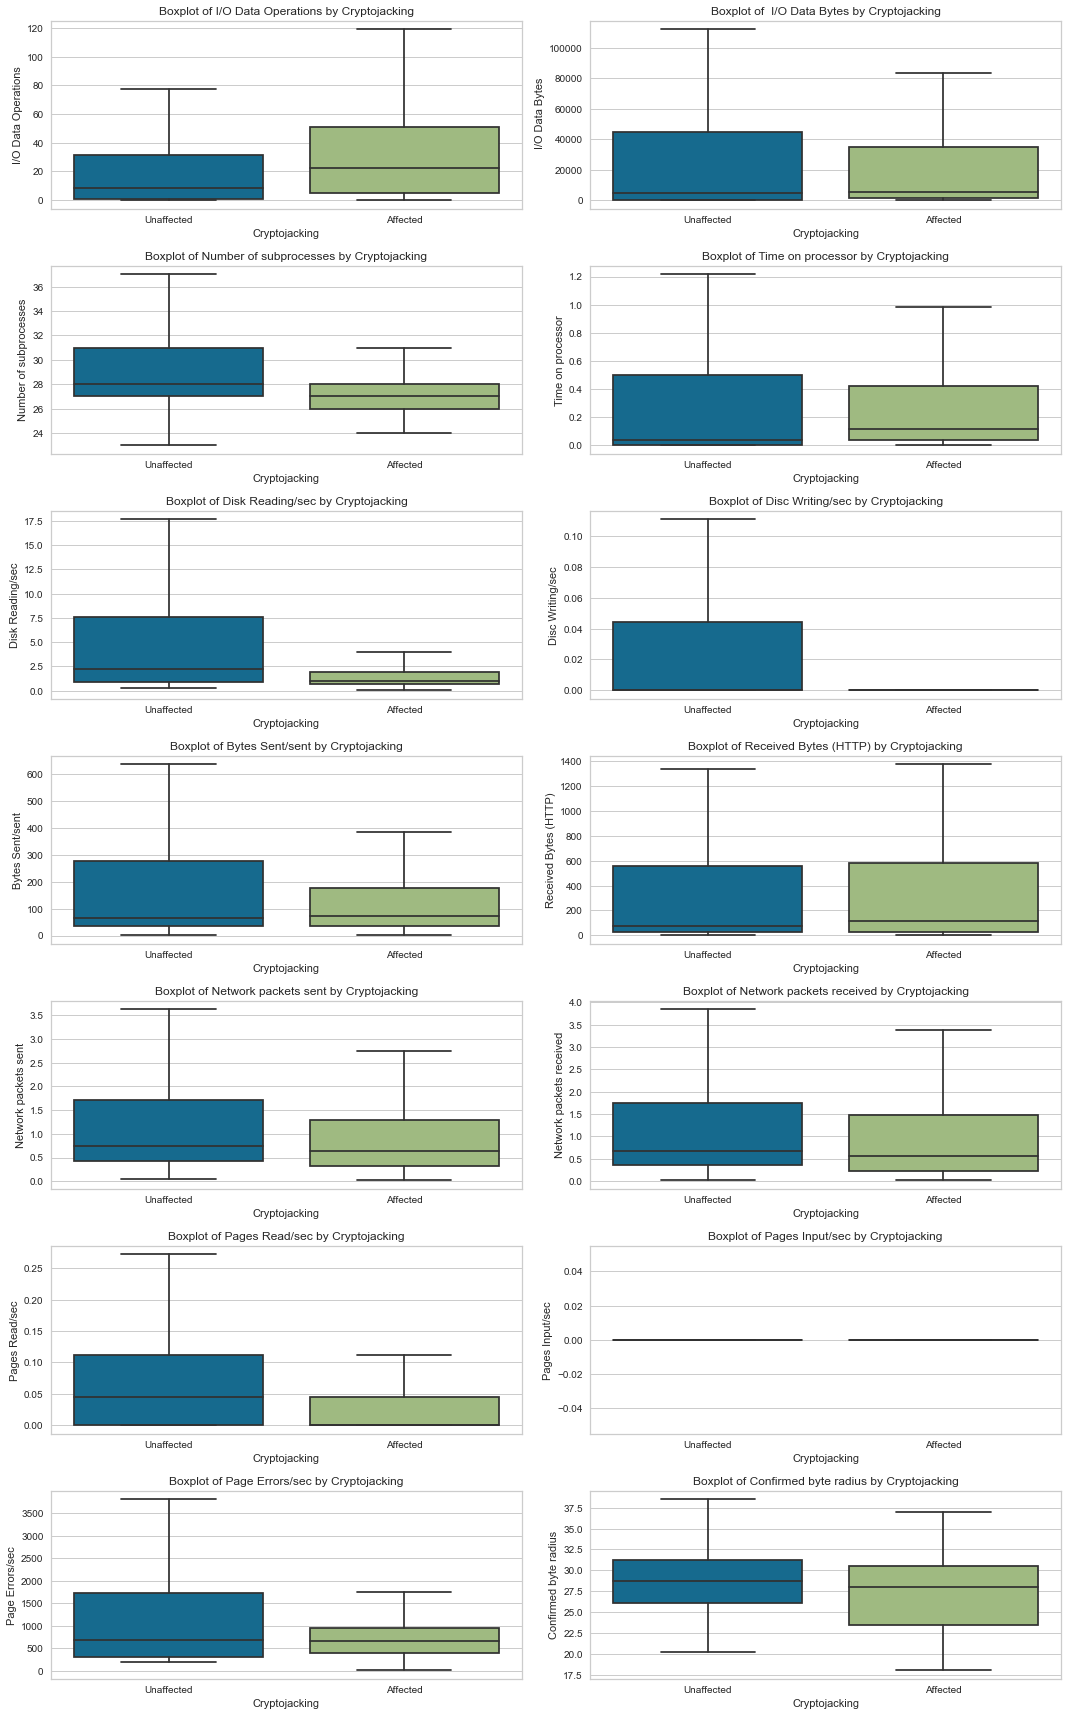

In [ ]:
# Boxplots for features
plt.figure(figsize=(15, 24))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(7, 2, i)
    sns.boxplot(x='Label', y=feature, data=train, showfliers=False)
    plt.title(f'Boxplot of {feature} by Cryptojacking')
    plt.xlabel('Cryptojacking')
    plt.ylabel(feature)
    plt.xticks(ticks=[0,1], labels=['Unaffected','Affected'])

plt.tight_layout()
plt.show()

<a name="Modelling"></a>
## 4. Model Training and Evaluation

<a name="Engineering"></a>
### 6.1 Feature Engineering

#### Train Test

In [ ]:
# Aggregating Network Features
# Combine network-related features into aggregated statistics
network_features = ['Bytes Sent/sent', 'Network packets sent', 'Received Bytes (HTTP)', 'Network packets received']
train['Total Network Traffics'] = train[network_features].sum(axis=1)
train['Total Network Sent'] = train[network_features[:2]].sum(axis=1)
train['Total Network Received'] = train[network_features[2:]].sum(axis=1)
train['Total Network Bytes'] = train[network_features[::2]].sum(axis=1)
train['Total Network Packets'] = train[network_features[1::2]].sum(axis=1)

# I/O Operations Ratio
# Calculate the ratio of I/O Data Operations to the total I/O Data Operations
train['I/O Data Operations'] = train['I/O Data Operations'] / train['I/O Data Operations'].sum()

# Disk Activity Ratios
# Calculate the ratios of Disk Reading/sec and Disk Writing/sec to total Disk Activity
train['Disk Reading Ratio'] = train['Disk Reading/sec'] / (train['Disk Reading/sec'] + train['Disc Writing/sec'])
train['Disc Writing Ratio'] = train['Disc Writing/sec'] / (train['Disk Reading/sec'] + train['Disc Writing/sec'])

# Page-Related Features
# Calculate the sum of Pages Read/sec, Pages Input/sec, and Page Errors/sec
train['Total Page Activity'] = train[['Pages Read/sec', 'Pages Input/sec', 'Page Errors/sec']].sum(axis=1)

# Confirmed Byte Radius Ratio
# Calculate the ratio of Confirmed Byte Radius to the maximum value in the dataset
train['Confirmed byte radius Ratio'] = train['Confirmed byte radius'] / train['Confirmed byte radius'].max()


#### Test Set

In [ ]:
# Aggregating Network Features
# Combine network-related features into aggregated statistics
network_features = ['Bytes Sent/sent', 'Network packets sent', 'Received Bytes (HTTP)', 'Network packets received']
test['Total Network Traffics'] = test[network_features].sum(axis=1)
test['Total Network Sent'] = test[network_features[:2]].sum(axis=1)
test['Total Network Received'] = test[network_features[2:]].sum(axis=1)
test['Total Network Bytes'] = test[network_features[::2]].sum(axis=1)
test['Total Network Packets'] = test[network_features[1::2]].sum(axis=1)

# I/O Operations Ratio
# Calculate the ratio of I/O Data Operations to the total I/O Data Operations
test['I/O Data Operations'] = test['I/O Data Operations'] / test['I/O Data Operations'].sum()

# Disk Activity Ratios
# Calculate the ratios of Disk Reading/sec and Disk Writing/sec to total Disk Activity
test['Disk Reading Ratio'] = test['Disk Reading/sec'] / (test['Disk Reading/sec'] + test['Disc Writing/sec'])
test['Disc Writing Ratio'] = test['Disc Writing/sec'] / (test['Disk Reading/sec'] + test['Disc Writing/sec'])

# Page-Related Features
# Calculate the sum of Pages Read/sec, Pages Input/sec, and Page Errors/sec
test['Total Page Activity'] = test[['Pages Read/sec', 'Pages Input/sec', 'Page Errors/sec']].sum(axis=1)

# Confirmed Byte Radius Ratio
# Calculate the ratio of Confirmed Byte Radius to the maximum value in the dataset
test['Confirmed byte radius Ratio'] = test['Confirmed byte radius'] / test['Confirmed byte radius'].max()


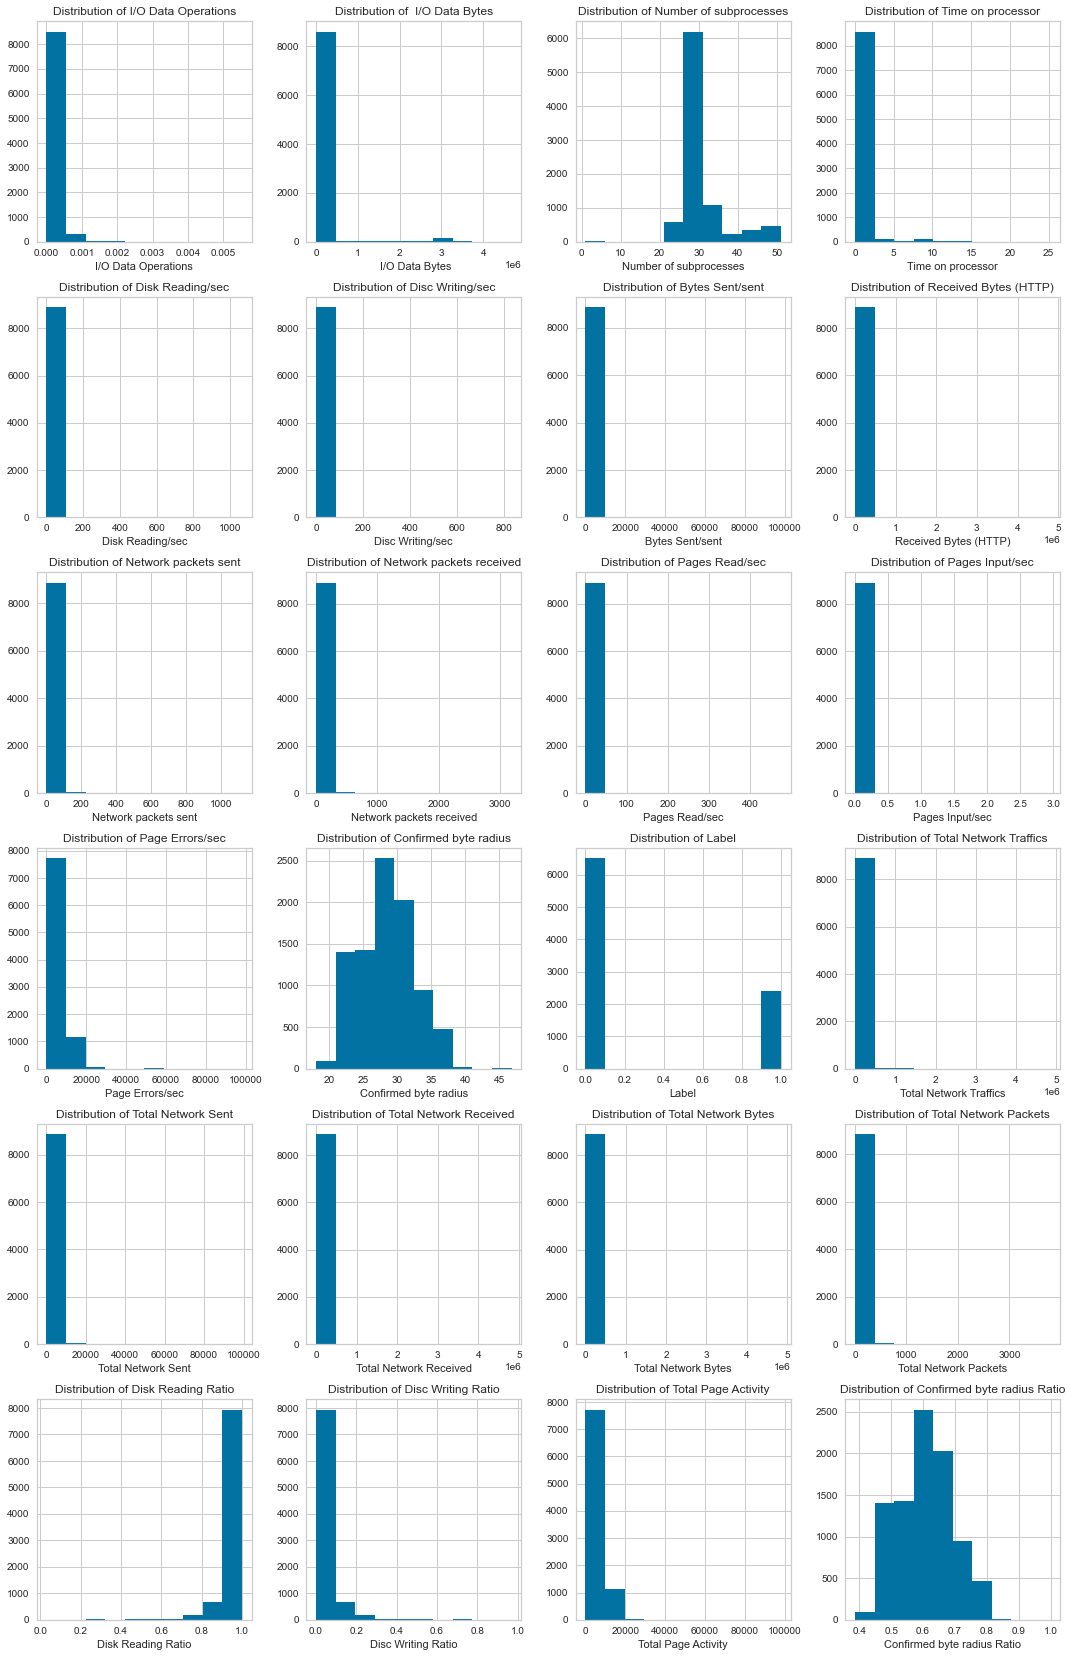

In [ ]:
# Histogram Distribution for features
new_features = train.select_dtypes('number').columns

plt.figure(figsize=(15, 24))
for i, feature in enumerate(new_features, 1):
    plt.subplot(6, 4, i)
    plt.hist(train[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

<a name="Split"></a>
### 4.2 Data Spliting

In [ ]:
#scale numerical features for XGBoost model
features = train.drop(columns=['ID','Label']).columns
target = 'Label'

# define standard scaler
scaler = StandardScaler()

# transform data
train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

#split train data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(

    train[features], # feature matrix to split into train and test sets

    train[target].to_frame(), # target column to split into train and test sets

    stratify=train[target], # to account for class imbalance

    test_size=0.2, # take 20% of the data for model evaluation

    random_state=SEED # to account for reproducible results
)


<a name="Features"></a>
### 4.3 Feature Selection

#### Different Scoring Metrics
There are different scoring metrics to choose from when selecting features that are more relavent in the choosen model. In our case, the Recall is the one to be used for both feature selection and model evaluation. However, other metrics will still be presented for the purpose of comparison. More details will be given in the [Model Building and Evaluation](#Modelling)

1. Accuracy:\
   Metric: **accuracy_score(y_true, y_pred)**\
   Use when: You want a simple and intuitive measure of overall model performance. It's suitable when class distribution is roughly balanced.


2. Precision:\
   Metric: **precision_score(y_true, y_pred)**\
   Use when: You want to minimize false positives. In cryptojacking detection, this means minimizing the instances where you incorrectly classify normal activity as cryptojacking.


3. Recall (Sensitivity):\
   Metric: **recall_score(y_true, y_pred)**\
   Use when: You want to minimize false negatives. In cryptojacking detection, this means minimizing the instances where you incorrectly classify cryptojacking as normal activity. \
   High recall is essential to avoid missing cryptojacking incidents.


4. F1-Score:\
   Metric: **f1_score(y_true, y_pred)**\
   Use when: You want to balance precision and recall. The F1-score is the harmonic mean of precision and recall and provides a single metric that considers both false positives and false negatives.


5. ROC-AUC Score:\
   Metric: **roc_auc_score(y_true, y_score)**\
   Use when: You want to evaluate the model's ability to distinguish between positive and negative classes across various threshold values. It's a suitable metric when class imbalance is present.


6. Confusion Matrix:\
   Use when: You want to understand the distribution of true positives, true negatives, false positives, and false negatives.
   This is helpful for a more detailed analysis of model performance and threshold tuning.



In [ ]:
def select_features(X_train, y_train, X_test, algorithm: object, step: int, min_feature: int, cv = None, scoring=None) -> pd.DataFrame:
    """Function to select all relevant features in the dataset

    Parameters:
        X_train, y_train, X_test: the training and test dataset needed to train the
        model
        algorithm: algorithm used to select features
        step: number of steps to take during elimination process
        min_feature: minimum number of features to select

    Return:
        dataset: new dataset with the selected features
    """

    # instantiate the Recursive Feature Elimination with Cross-Validation
    # to select relevant features
    algo = RFECV(estimator=algorithm,
                 step=step,
                 cv=cv,
                 min_features_to_select=min_feature,
                 scoring=scoring,
                 verbose=2,
                 n_jobs=-1)

    # fit the algorithm to the data
    algo.fit(X_train, y_train)

    # transform train input data
    X_train_ts = algo.transform(X_train)

    # transform test input data
    X_test_ts = algo.transform(X_test)

    return X_train_ts, X_test_ts, algo

In [ ]:
# define XGBoost parameters
params = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'seed': SEED
}

# applying feature selection method
algo = XGBClassifier(**params)
min_feature = 1
step = 1

# split method for feature selection
kfold= StratifiedKFold(n_splits=5, random_state=SEED, shuffle=True)

X_train_fs, X_test_fs, algo = select_features(
    X_train, y_train, X_test, algo, step, min_feature,
    cv = kfold,
    scoring='recall'
)

print('Relevant number of features:', algo.n_features_)
print('\nHere are the features:')
print('----------------------------------')

pd.DataFrame(X_train.columns[algo.ranking_ == 1], columns=['Selected Features'])

Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Relevant number of features: 12

Here are the features:
----------------------------------


,Selected Features
0,I/O Data Operations
1,I/O Data Bytes
2,Number of subprocesses
3,Time on processor
4,Disk Reading/sec
5,Received Bytes (HTTP)
6,Network packets received
7,Page Errors/sec
8,Confirmed byte radius
9,Total Network Traffics


In [ ]:
# creating new train and test data using selected features
X_train_fs = pd.DataFrame(X_train_fs, columns=list(X_train.columns[algo.ranking_ == 1]))
X_test_fs = pd.DataFrame(X_test_fs, columns=list(X_test.columns[algo.ranking_ == 1]))

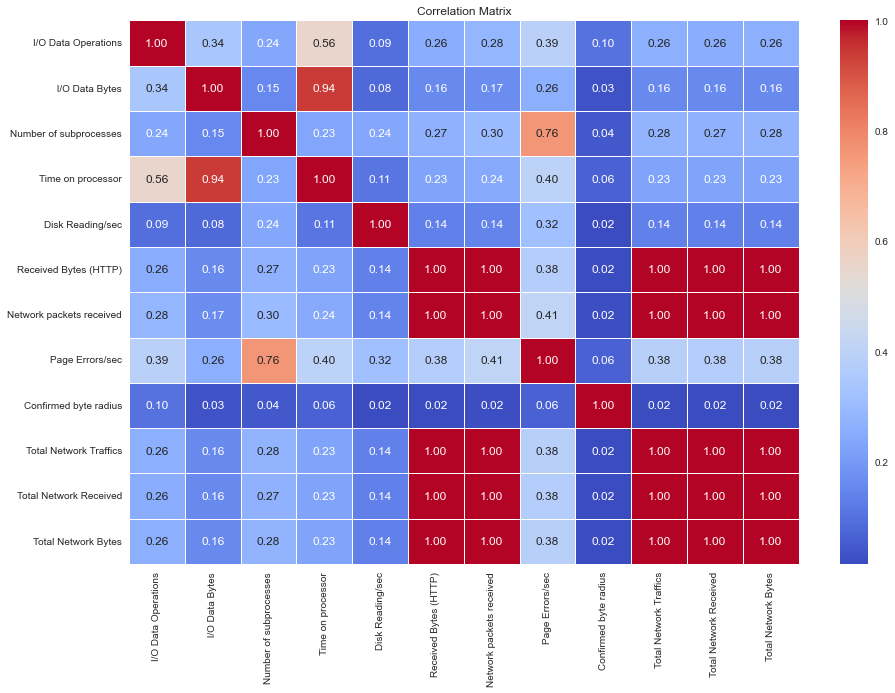

In [ ]:
# Correlation analysis
correlation_matrix = X_train_fs.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# <a name="Training"></a>
### 4.4 Model Building

### 4.3.1 Using the Logistic regression model.

In [ ]:
#reading the train and test datasets
df1=pd.read_csv('Train.csv')  # Read train data
df2=pd.read_csv('Test.csv')

#dropping the ID column
df1.drop("ID",axis=1, inplace=True)

In [ ]:
#data splitting
# train 70% of the data and 30% of the test data

train, test = train_test_split(df1, test_size = 0.3, random_state = 20)


In [ ]:
# Rename the 'Label' column to a new name 'Target'.
#"inplace=True" ensures changes directly applies to df
#'Label' has been renamed to 'Target'.Check last column.
# check by displaying only column headings

df1.rename(columns={'Label': 'Target'}, inplace=True)
target_column = df1['Target']
df1.head(0)

,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Target


In [ ]:
X = df1.iloc[:, :14]  # Select the first 14 columns as features and
y = df1['Target']     # 'Target' is the name of your target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=20)


In [ ]:
#defining the model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [ ]:
print("Training data has a shape of", train.shape)
print("Testing data has a shape of", test.shape)

Training data has a shape of (6235, 15)
Testing data has a shape of (2673, 15)


### The Accuracy

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
classification_report_str=classification_report(y_test,y_pred)

print(f"Accuracy: {accuracy:.2f}")

#print("Classification Report:")
print(classification_report_str)


Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1941
           1       0.68      0.08      0.14       732

    accuracy                           0.74      2673
   macro avg       0.71      0.53      0.49      2673
weighted avg       0.72      0.74      0.65      2673



**The provided classification metrics pertain to a model's performance in detecting
  cryptojacking.**

**Interpreting these metrics in the context of cryptojacking:**

1. **Accuracy (overall correctness of the model's predictions)**:
   - the model correctly classified 74% of the total instances in our dataset.

2. **Precision**:
   - Precision for class 0 (negative class) is 0.74, meaning that when the model predicted a sample as "not cryptojacking," it was correct 74% of the time.
   - Precision for class 1 (positive class) is 0.68, meaning that when the model predicted a sample as "cryptojacking," it was correct 68% of the time.

3. **Recall**:
   - Recall for class 0 (negative class) is 0.99, indicating that the model correctly identified almost all of the actual "not cryptojacking" instances (a high recall).
   - Recall for class 1 (positive class) is 0.08, which suggests that the model missed a significant portion of the actual "cryptojacking" instances ( a very low recall).

4. **F1-Score**:
   - The F1-score for class 0 is 0.85, which is relatively high and indicates a good balance between precision and recall for "not cryptojacking" instances.
   - The F1-score for class 1 is 0.13, which is quite low, indicating that the model's performance for "cryptojacking" detection is not balanced, primarily due to the very low recall.

In the context of cryptojacking:

- The model appears to be effective at identifying non-cryptojacking instances (class 0) with high precision and recall, meaning it correctly detects normal operations.

- However, the model struggles significantly in identifying cryptojacking attempts (class 1). The very low recall for class 1 indicates that the model misses a substantial number of actual cryptojacking attacks. This is a critical issue because failing to detect cryptojacking attacks can result in compromised systems and unauthorized cryptocurrency mining, which consumes resources and poses security risks.

Addressing this problem may involve:

- Improving the model by gathering more relevant features or using advanced techniques.
- Balancing the class distribution to prevent the model from being biased toward the majority class (class 0).
- Exploring different machine learning algorithms or models specifically designed for anomaly detection or rare event detection.
- Conducting further analysis to identify why cryptojacking instances are challenging to detect and addressing those challenges in feature engineering or model design.

In summary, while the model is effective at detecting normal operations, it needs significant improvements in identifying cryptojacking attempts to enhance overall security and prevent resource-intensive unauthorized cryptocurrency mining.

<a name="DecisionTree"></a>
##  Decision Tree Classifier

In [ ]:
#importing relevant libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve


In [ ]:
#loading the train dataset
train_df = pd.read_csv('Train.csv')
# train_df

#loading the test dataset
test_df=pd.read_csv('Test.csv')
# test_df

In [ ]:
#dropping the ID columns in the train and test datasets
train_data=train_df.drop("ID", axis=1)
test_data=test_df.drop("ID", axis=1)

## About The Decision tree

### Pros:
- Interprability
- Nodata normalization needed
- Non-parametric(i.e., no assumptions are made about the data distribution. Can capture both linear and nonlinear relationships)
- Handles missing values by splitting data based on features
- Provides information about feature importance to decision making

### Cons
- prone to verfitting especially when tree gets too deep
- High variance (which can me mitigated by using ensemble methods)
- bias towards deominant classes
- instability: small changes in training data may lead to different values
- greedy nature/approach might not always lead to globally optimal tree

  

In [ ]:
#separating the features and leables in the train_data
X = train_data.drop("Label", axis=1)
Y = train_data['Label']

#split the train_data into a train and test set to  use for training and evaluation of model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


#defining the decison tree classifier
decision_tree = DecisionTreeClassifier() #(max_depth = 4, random_state=42)

In [ ]:
#set crossvalidation to get paramater tuning done (using grid search)
#defining the parameter grid dictionary
parameter_grid={
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'max_depth':[None, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

#GridSearchCV object
grid_search = GridSearchCV(decision_tree, param_grid=parameter_grid, scoring='accuracy', cv=5, n_jobs=-1)

#fitting the gridsearchcv to the train_data
grid_search.fit(X_train, Y_train)

#obtaining the best hyperparameters and model
best_params = grid_search.best_params_
best_decision_tree_model = grid_search.best_estimator_

#making predictions on the test set
Y_pred = best_decision_tree_model.predict(X_test)

In [ ]:
#after hyperparamter tuning, we print the best ones
print('Best Hyperparameters:', best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [ ]:
#calculating the accuracy and generating report
accuracy = accuracy_score(Y_test, Y_pred)
print('Test Accuracy:', accuracy)
#classification report
report=classification_report(Y_test, Y_pred)
print('Classification report:\n', report)

Test Accuracy: 0.9489337822671156
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1294
           1       0.91      0.90      0.91       488

    accuracy                           0.95      1782
   macro avg       0.94      0.93      0.94      1782
weighted avg       0.95      0.95      0.95      1782



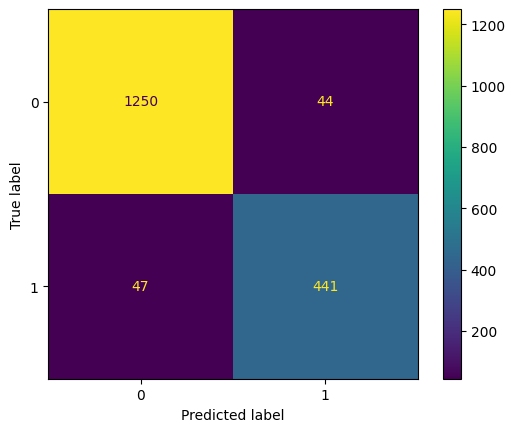

In [ ]:
#getting the confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt
conf_matrix=metrics.confusion_matrix(Y_test, Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

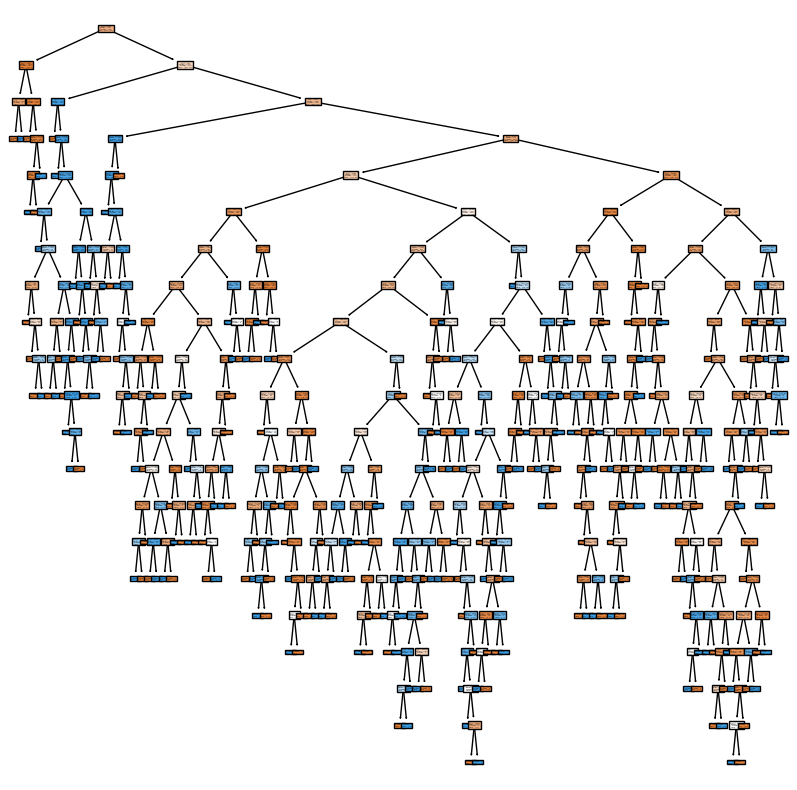

In [ ]:
# plotting the tree using the best_decision_tree_model
plt.figure(figsize=(10, 10)) # Resize figure
plot_tree(best_decision_tree_model, filled=True)
plt.show()

## XGBoost Classifier

In [ ]:
# create the XGBoost classifier
model = XGBClassifier(**params, random_state=SEED)
model.fit(X_train_fs, y_train)

print('Accuracy classifier on training set: {:.4f}'.format(model.score(X_train_fs, y_train)))
print('Accuracy classifier on test set: {:.4f}'.format(model.score(X_test_fs, y_test)))

y_pred = model.predict(X_test_fs)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rocauc = roc_auc_score(y_test, y_pred)
print('Precision score: {:.4f}'.format(precision))
print('Recall score: {:.4f}'.format(recall))
print('f1 score: {:.4f}'.format(f1))
print('ROC AUC score: {:.4f}'.format(rocauc))

Accuracy classifier on training set: 0.9517
Accuracy classifier on test set: 0.9400
Precision score: 0.9289
Recall score: 0.8420
f1 score: 0.8833
ROC AUC score: 0.9091


In [ ]:
# precision_recall_fscore_support(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1301
           1       0.93      0.84      0.88       481

    accuracy                           0.94      1782
   macro avg       0.94      0.91      0.92      1782
weighted avg       0.94      0.94      0.94      1782



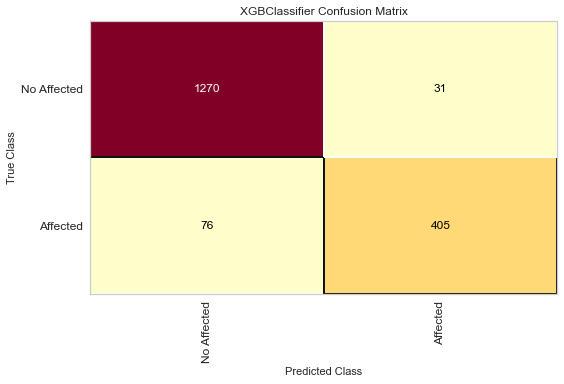

In [ ]:
# Specify the target classes
classes = ['No Affected', 'Affected']

# instantiate the matrix
cm = ConfusionMatrix(model, classes=classes,label_encoder={0: 'Not Affected', 1: 'Affected'})

# fit and plot the results
cm.fit(X_train_fs, y_train)
cm.score(X_test_fs, y_test)
cm.show()
plt.show()

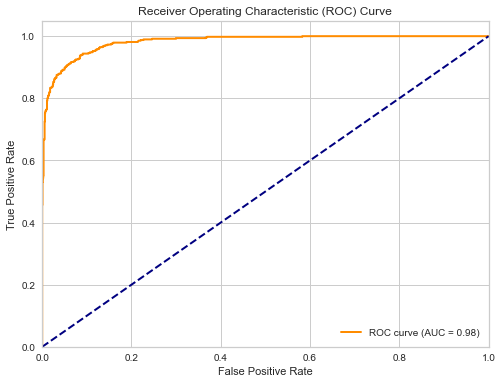

In [ ]:
# Predict probabilities for the positive class
y_pred_prob = model.predict_proba(X_test_fs)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate ROC-AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<a name="Tuning"></a>
### 4.4 Hyperparameter Tuning

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.05, 0.06, 0.07, 0.08],
    'n_estimators': [300, 400, 500],
}

# Create the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=SEED)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    xgb_classifier,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    verbose=2,
    n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(X_train_fs, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_y_pred = best_model.predict(X_test_fs)
best_accuracy = accuracy_score(y_test, best_y_pred)
print(f'Accuracy with Best Hyperparameters: {best_accuracy:.2f}')

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Hyperparameters: {'learning_rate': 0.08, 'max_depth': 4, 'n_estimators': 500}
Accuracy with Best Hyperparameters: 0.97


In [ ]:
print(classification_report(y_test, best_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1301
           1       0.96      0.94      0.95       481

    accuracy                           0.97      1782
   macro avg       0.97      0.96      0.96      1782
weighted avg       0.97      0.97      0.97      1782



In [ ]:
bparams = {
    'max_depth': 4,
    'learning_rate': 0.08,
    'n_estimators': 500,
    'seed': SEED
}

bmodel = XGBClassifier(**bparams, random_state=SEED)
bmodel.fit(X_train_fs, y_train)

print('Accuracy classifier on training set: {:.4f}'.format(bmodel.score(X_train_fs, y_train)))
print('Accuracy classifier on test set: {:.4f}'.format(bmodel.score(X_test_fs, y_test)))

by_pred = bmodel.predict(X_test_fs)

bprecision = precision_score(y_test, by_pred)
brecall = recall_score(y_test, by_pred)
bf1 = f1_score(y_test, by_pred)
brocauc = roc_auc_score(y_test, by_pred)
print('Precision score: {:.4f}'.format(bprecision))
print('Recall score: {:.4f}'.format(brecall))
print('f1 score: {:.4f}'.format(bf1))
print('ROC AUC score: {:.4f}'.format(brocauc))

Accuracy classifier on training set: 0.9978
Accuracy classifier on test set: 0.9725
Precision score: 0.9615
Recall score: 0.9356
f1 score: 0.9484
ROC AUC score: 0.9609


In [ ]:
print(classification_report(y_test, by_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1301
           1       0.96      0.94      0.95       481

    accuracy                           0.97      1782
   macro avg       0.97      0.96      0.96      1782
weighted avg       0.97      0.97      0.97      1782



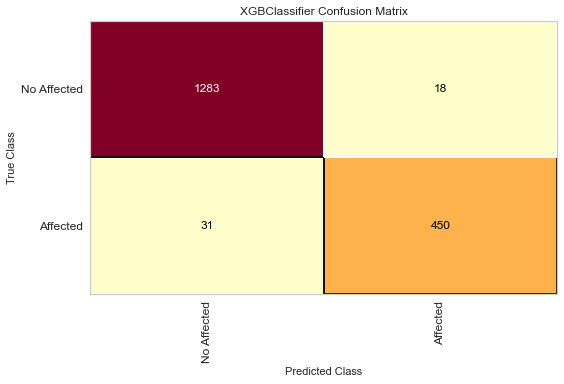

In [ ]:
# instantiate the matrix
cm = ConfusionMatrix(bmodel, classes=classes,label_encoder={0: 'Not Affected', 1: 'Affected'})

# fit and plot the results
cm.fit(X_train_fs, y_train)
cm.score(X_test_fs, y_test)
cm.show()
plt.show()

<a name="Selection"></a>
## 5. Final Model Selection
Comparing the outcomes of all the models above, we conclude that the best model for the classification/detection of cryptojacking is the XGBoost Classifier
<table>
  <tr>
    <th>Model</th>
    <th>Accuracy</th>
    <th>Recall</th>
    <th>Precision</th>
    <th>F-1 Score</th>
    <th>Support</th>
  </tr>
  <tr>
    <td>XG Boost</td>
    <td></td>
    <td>0.94</td>
    <td>0.96</td>
    <td>0.95</td>
    <td>1301</td>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>0.95</td>
    <td>0.90</td>
    <td>0.91</td>
    <td>0.91</td>
    <td></td>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>0.74</td>
    <td>0.08</td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
</table>


